In [1]:
#1.	Obtain the hypothesis space search by Find-S for the given training examples.
sky=['sunny','sunny','rainy','sunny']
airtemp=['warm','warm','cold','warm']
hum=['normal','high','high','high']
wind=['strong','strong','strong','strong']
water=['warm','warm','warm','cool']
fc=['same','same','change','change']
esport=['yes','yes','no','yes']

In [2]:
data={"Sky":sky,"Airtemp":airtemp,'Humidity':hum,'Wind':wind,'Water':water,'Forecast':fc,'Enjoysport':esport}

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.DataFrame(data)

In [5]:
df.to_csv('sport.csv')

In [6]:
#initial value of hypothesis
h=['0']*6
for instance in df.values:
    if instance[-1]=='yes':
        for j in range(len(h)):
            if (h[j]=='0' or h[j]==instance[j]):
                h[j]=instance[j]
            elif h[j]!=instance[j]:
                h[j]='?'
print("the maximally hypothesis  is:",h)

the maximally hypothesis  is: ['sunny', 'warm', '?', 'strong', '?', '?']


In [7]:
#2.Apply Candidate Elimination Algorithm for the given training examples to obtain a hypothesis space. 

In [8]:
import csv
with open('sport.csv')  as csvFile:
        examples = [tuple(line[1:]) for line in csv.reader(csvFile)]
examples=examples[1:]

In [9]:
examples

[('sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'),
 ('sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'),
 ('rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'),
 ('sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes')]

In [10]:

def g_0(n):
    return ("?",)*n

def s_0(n):
    return ('0',)*n



In [11]:
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == "?" or (x != "0" and (x == y or y == "0"))
        more_general_parts.append(mg)
    return all(more_general_parts)
        

In [12]:
def fulfills(example, hypothesis):
    ### the implementation is the same as for hypotheses:
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not fulfills(x[i:i+1], h[i:i+1]):
            h_new[i] = '?' if h[i] != '0' else x[i]
    return [tuple(h_new)]

In [13]:
def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == "?":
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != "0":
            h_new = h[:i] + ('0',) + h[i+1:]
            results.append(h_new)
    return results

In [14]:
def get_domains(examples):
    d = [set() for i in examples[0]]
    for x in examples:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]

In [15]:
def generalize_S(x, G, S):
    S_prev = set(S)
    for s in S_prev:
        if s not in S:
            continue
        if not fulfills(x, s):
            S.remove(s)
            Splus = min_generalizations(s, x)
            ## keep only generalizations that have a counterpart in G
            S.update([h for h in Splus if any([more_general(g,h) 
                                               for g in G])])
            ## remove hypotheses less specific than any other in S
            S.difference_update([h for h in S if 
                                 any([more_general(h, h1) 
                                      for h1 in S if h != h1])])
    return S

In [16]:
def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if fulfills(x, g):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            ## keep only specializations that have a conuterpart in S
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            ## remove hypotheses less general than any other in G
            G.difference_update([h for h in G if 
                                 any([more_general(g1, h) 
                                      for g1 in G if h != g1])])
    return G

In [17]:
def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]
    
    G = set([g_0(len(domains)-1)])
    S = set([s_0(len(domains)-1)])
    i=0
    print("\n G[{0}]:".format(i),G)
    print("\n S[{0}]:".format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]  # Splitting data into attributes and decisions
        if cx=='yes': # x is positive example
            G = {g for g in G if fulfills(x, g)}
            S = generalize_S(x, G, S)
        else: # x is negative example
            S = {s for s in S if not fulfills(x, s)}
            G = specialize_G(x, domains, G, S)
        print("\n G[{0}]:".format(i),G)
        print("\n S[{0}]:".format(i),S)
    return

In [18]:
candidate_elimination(examples)


 G[0]: {('?', '?', '?', '?', '?')}

 S[0]: {('0', '0', '0', '0', '0')}

 G[1]: {('?', '?', '?', '?', '?')}

 S[1]: {('sunny', 'warm', 'normal', 'strong', 'warm')}

 G[2]: {('?', '?', '?', '?', '?')}

 S[2]: {('sunny', 'warm', '?', 'strong', 'warm')}

 G[3]: {('?', 'warm', '?', '?', '?'), ('sunny', '?', '?', '?', '?')}

 S[3]: {('sunny', 'warm', '?', 'strong', 'warm')}

 G[4]: {('?', 'warm', '?', '?', '?'), ('sunny', '?', '?', '?', '?')}

 S[4]: {('sunny', 'warm', '?', 'strong', '?')}


In [19]:
#3.Use ID3 Algorithm to develop the decision tree support system for the following training data set.
df2=pd.read_csv("sport1.csv")
dataset=pd.read_csv('sport1.csv')
dataset=dataset.iloc[:,1:6]
X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,-1].values
X
y

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [20]:
#categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])
X[:,1]=labelencoder_X.fit_transform(X[:,1])
X[:,2]=labelencoder_X.fit_transform(X[:,2])
X[:,3]=labelencoder_X.fit_transform(X[:,3])
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
#print(y)

In [21]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#'sunny','cool','high','strong'

In [22]:

#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#it will learn and transform
X_test=sc.transform(X_test)

In [23]:
#Fitting Decision Tree classififcation to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

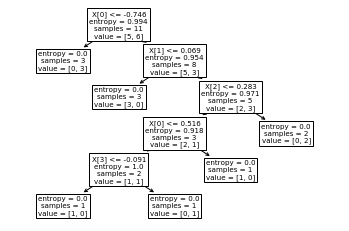

In [25]:
tree.plot_tree(classifier.fit(X_train, y_train))
plt.show()

In [ ]:
#4.Data set given in the table is for a company produce tissues (used by biological labs). 
#Company objective is to predict how well their products are accepted by the clients. They conducted a survey with their clients to find the acceptance levels of the products.
#As shown in figure, Type- 1 and 2 are not well accepted whereas Type- 3 and 4 are well accepted. 

In [108]:
import numpy as np
import pandas as pd

X=np.array( [[7,7],
    [7,4],
    [3,4],
    [1,4]])

In [109]:
y=np.array(["BAD","BAD","GOOD","GOOD"])

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state =0)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [112]:
y_pred = knn.predict(np.array([[3,7]]))
y_pred

array(['BAD'], dtype='<U4')

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 0],
       [1, 0]], dtype=int64)

In [107]:
print (knn.predict([[1,4]]))

['BAD']


In [26]:
#5.Apply the naive Bayes classifier to a concept learning problem to classify days according to whether someone will 
#play tennis. The table given below provides a set of 14 training examples of the target concept PlayTennis, 
#where each day is described by the attributes Outlook, Temperature, Humidity, and Wind. 
sky=['sunny','sunny','overcast','rain','rain','rain','overcast','sunny','sunny','rain','sunny','overcast','overcast','rain']
airtemp=['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']
hum=['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high']
wind=['weak','strong','weak','weak','weak','strong','strong','weak','weak','weak','strong','strong','weak','strong']
esport=['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

In [27]:
data={"sky":sky,'airtemp':airtemp,'humidity':hum,'wind':wind,'Enjoy sport':esport}

In [28]:
import numpy as np
import pandas as pd
df1=pd.DataFrame(data)


In [29]:
df1.to_csv('sport1.csv')

In [30]:
#Naives Bayes classification

#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [31]:
#importing the dataset
dataset=pd.read_csv('sport1.csv')
dataset=dataset.iloc[:,1:6]
X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,-1].values

In [32]:
#categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])
X[:,1]=labelencoder_X.fit_transform(X[:,1])
X[:,2]=labelencoder_X.fit_transform(X[:,2])
X[:,3]=labelencoder_X.fit_transform(X[:,3])
#onehotencoder=OneHotEncoder(categorical_features=[0,1,2,3])
#X=onehotencoder.fit_transform(X).toarray()
print(X.dtype)
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
print(y)
#if there is more than three value we can use hotencoder
#[2,0,0,0]


object
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [33]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=0)
#['sunny','cool','high','strong']

In [34]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#it will learn and transform
#X_test=[2,0,0,0]
X_test=sc.transform(X_test)
len(X_test)
X_test

array([[ 1.27475488, -1.53960072,  1.08012345,  0.9258201 ]])

In [35]:
#Fitting Naives Bayes classififcation to the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
#X_test=np.array([2,0,0,0])
#Predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=classifier.predict(np.array([[2,0,0,0]]))#sunny,cool,high,strong
y_pred

array([0])

In [36]:
#6.	Develop a Decision Tree for the given data set and find the accuracy of the model.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
df2=pd.read_csv("Social_Network_Ads.csv")

In [39]:
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values
#df2

In [40]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [41]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#it will learn and transform
X_test=sc.transform(X_test)


In [44]:
#Fitting Decision tree classififcation to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [45]:
#Predicting the test set results
y_pred=classifier.predict(X_test)

In [46]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.91

In [47]:
#7.	Develop a Naïve Bayes Classifier for the given data set and find the accuracy of the model.
import pandas as pd
import numpy as np
df=pd.read_csv("Social_Network_Ads.csv")


In [48]:
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values


In [49]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [50]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#it will learn and transform
X_test=sc.transform(X_test)


In [51]:
#Fitting Naives Bayes classififcation to the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
#Predicting the test set results
y_pred=classifier.predict(X_test)

In [53]:
import sklearn
sklearn.metrics.accuracy_score(y_pred,y_test)

0.9

In [54]:
#8.	Develop a Logistic Regression classifier for the given data set and find the accuracy of the model

In [55]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

E:\New folder (2)\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#Predicting the test set results
y_pred=classifier.predict(X_test)

In [57]:
import sklearn
sklearn.metrics.accuracy_score(y_pred,y_test)

0.89

In [58]:
#9.	Develop a K-NN model for the given data set and find the accuracy of the model.

In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
#Predicting the test set results
y_pred=classifier.predict(X_test)


In [98]:
import sklearn
print(sklearn.metrics.accuracy_score(y_pred,y_test))
cm=sklearn.metrics.confusion_matrix(y_pred,y_test)
cm

0.93


array([[62,  1],
       [ 6, 31]], dtype=int64)

In [100]:
#18.	Write the  Python code to calculate the following
#a.	Accuracy 
#b.	Misclassification  
#c.	Type-1 and Type-2 error rates
#d.	Sensitivity
#e.	Specificity
Accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
Misclassification=1-Accuracy
type1er=cm[1,0]/(cm[1,0]+cm[1,1]) #FP rate
type2er=cm[0,1]/(cm[0,0]+cm[0,1]) #FN rate
sensitivity=(cm[0,0])/(cm[0,0]+cm[1,0]) #recall or true positive rate
specifivity=(cm[1,1])/(cm[1,1]+cm[0,1]) #true negativity rate
print("Accuracy:",Accuracy)
print("Misclassification:",Misclassification)
print("type1 error:",type1er)
print("type2 error:",type2er)
print("sensitivity:",sensitivity)
print("specifivity:",specifivity)

Accuracy: 0.93
Misclassification: 0.06999999999999995
type1 error: 0.16216216216216217
type2 error: 0.015873015873015872
sensitivity: 0.9117647058823529
specifivity: 0.96875


In [63]:
#10.	Develop a linear regression for the given data set and find the accuracy of the model.

In [64]:
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values

In [65]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [66]:
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# #rom sklearn.decomposition import PCA as p
# pc=p(n_components=1)
# X_train=pc.fit_transform(X_train)
# X_test=pc.transform(X_test)
# #X_train

In [68]:
#Predicting the test set results
y_pred=classifier.predict(X_test)

In [69]:
#import sklearn
#sklearn.metrics.accuracy_score(y_pred,y_test)

In [70]:
#12.Develop a random forest for the given data set and find the accuracy of the model.

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

E:\New folder (2)\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
y_pred=classifier.predict(X_test)

In [73]:
sklearn.metrics.accuracy_score(y_pred,y_test)

0.93

In [74]:
#13.Compare the performance of all the classifiers

E:\New folder (2)\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ne

LR: 0.637500 (0.243734)


E:\New folder (2)\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of 

RFA: 0.865000 (0.081548)
KNN: 0.762500 (0.129542)
CART: 0.855000 (0.092060)
NB: 0.857500 (0.098139)


E:\New folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\New folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gam

SVM: 0.667500 (0.213029)


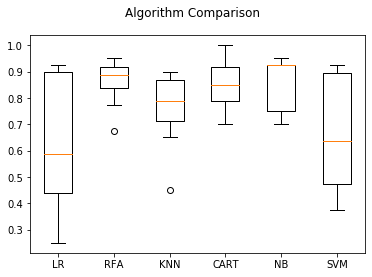

In [75]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
df2=pd.read_csv('Social_Network_Ads.csv')
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFA', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [76]:
#14.Write the Python code to compute entropy and information gain

In [77]:
df=pd.read_csv("sport1.csv")

In [78]:
df=df.iloc[:,1:]

In [79]:
c=0
y=0
n=0
for i in df.values:
    c=c+1
    if i[-1]=='yes':
        y=y+1
    else:
        n=n+1
tot_wt=-((y/c)*(np.log10(y/c)/np.log10(2))+(n/c)*(np.log10(n/c)/np.log10(2)))

In [80]:
p=len(df)
tot_wt

0.9402859586706309

In [81]:

def entropy(s):
    c=0
    y=0
    n=0
    for i in s.values:
        c=c+1
        if i[-1]=='yes':
            y=y+1
        else:
            n=n+1
        #print("tot",c)
        #print("yes",y)
        if n==0:
            j=0
        else:
            j=(n/c)*(np.log10(n/c)/np.log10(2))
        if y==0:
            k=0
        else:
            k=(y/c)*(np.log10(y/c)/np.log10(2))
    return -(j+k)

In [82]:
def information_gain(s,colname):
    g=0
    for i in np.unique(df[colname].values):
        l=len(s[s[colname]==i])
        g=g+(l/p)*entropy(s[s[colname]==i])
    return tot_wt-g
        
        
    

In [83]:
for i in df.columns[:-1]:
    print(information_gain(df,i))


0.246749819774439
0.029222565658954647
0.15183550136234147
0.04812703040826927


In [84]:
#15.Write the  Python code todemonstrate conditional probability 

In [85]:
def prob(l,a,k):
    n=len(df[df[l]==a][df['Enjoy sport']==k])
    k=len(df[df[l]==a])
    return n/k

In [86]:
def naive_bayes(s,c,h,m):
    yc=len(df[df['Enjoy sport']=='yes'])
    nc=len(df[df['Enjoy sport']=='no'])
    n=len(df)
    i,j,k,l=df.columns[:-1]
    vsb=(yc/n)*prob(i,s,'yes')*prob(j,c,'yes')*prob(k,h,'yes')*prob(l,m,'yes')
    vnb=(yc/n)*prob(i,s,'no')*prob(j,c,'no')*prob(k,h,'no')*prob(l,m,'no')
    print(vsb)
    print(vnb)
    if vsb>vnb:
        print(vsb)
        print("is going to play")
    else:
        print(vnb)
        print("not going")
naive_bayes('sunny','cool','high','strong')
    

E:\New folder (2)\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.0413265306122449
0.027551020408163266
0.0413265306122449
is going to play


In [87]:
#16.Write the  Python code to compute Euclidean Distance between data points

In [88]:
def euclidean_dist(x1,x2,y1,y2):
    dist=np.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist

In [89]:
euclidean_dist(3,6,8,3)

5.830951894845301

In [90]:
#17.Write the  Python code to calculate covariance matrix, Eigen values and Eigen vectors 
A = np.array([[9,2,3],[2,3,4],[9,5,2]])

In [91]:
w,v = np.linalg.eig(A)
print('eigen vector',v)
print('eigen value',w)

eigen vector [[-0.63566346 -0.4386726  -0.11958179]
 [-0.381541    0.85683887 -0.54787598]
 [-0.6710875   0.27091236  0.82796867]]
eigen value [13.36763265  3.24077366 -2.60840631]


In [92]:
np.cov(A)

array([[14.33333333, -3.        , 11.16666667],
       [-3.        ,  1.        , -3.5       ],
       [11.16666667, -3.5       , 12.33333333]])

In [93]:
A=np.array([1,5,4,7,9,6])
B=np.array([2,9,7,4,1,6])
a=A.mean()
b=B.mean()
covAB=np.sum((A-a)*(B-b))
covBA=covAB
covAA=np.sum((A-a)**2)
covBB=np.sum((B-b)**2)

In [94]:
np.array([[covAA,covAB],[covBA,covBB]])


array([[37.33333333, -6.66666667],
       [-6.66666667, 46.83333333]])

In [95]:
#apply PAC for the given data set 
df3=pd.read_csv("sport1.csv")
df3=df3.iloc[:,1:]
n=[]
for i in range(len(df3.columns)-1):
    k=df3.iloc[:,i].unique()
    n.append(len(k)+2)#y +2    
print(n)
Hs=np.prod(n)
Hs

[5, 5, 4, 4]


400

In [96]:
def num_train_eg(hs,D,E):
    m=(1/E)*(np.log10(hs)/np.log10(2)+np.log10(1/D)/np.log10(2))
    return m
print("Number of training examples required is : ",num_train_eg(Hs,0.05,0.05))
#E-true error D-traing error

Number of training examples required is :  259.3156856932418


In [97]:
#agnestic
def train_req(hs,D,E):
    m=(1/(2*(E**2)))*(np.log10(hs)/np.log10(2)+np.log10(1/D)/np.log10(2))
    return m
print("Number of training examples required is : ",num_train_eg(Hs,0.05,0.05))

Number of training examples required is :  259.3156856932418
